In [1]:
#%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
import pickle

# Paths to S2 and S3 data files
data_set = r"D:/MINI_PRO/WESAD/"
s2_path = data_set + r"S2/S2.pkl"
s3_path = data_set + r"S3/S3.pkl"

# Load the data from both S2.pkl and S3.pkl with encoding for Python 2 pickling
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

with open(s3_path, 'rb') as file:
    s3_data = pickle.load(file, encoding='latin1')

# Combine the data into a single dictionary or list (choose based on data structure)
combined_data = {'S2': s2_data, 'S3': s3_data}  # For dictionaries, or [s2_data, s3_data] if list format works better

# Path to save combined data
combined_path = data_set + r"\S2_S3_combined.pkl"

# Save the combined data to a new file
with open(combined_path, 'wb') as file:
    pickle.dump(combined_data, file)

print("Data from S2 and S3 combined and saved to:", combined_path)


Data from S2 and S3 combined and saved to: D:/MINI_PRO/WESAD/\S2_S3_combined.pkl


In [3]:
# Loop through each subject in the combined data (S2 and S3)
for subject_id, subject_data in combined_data.items():
    print(f"\nExtracting data for {subject_id}...")

    # Chest signals
    c_ax = subject_data['signal']['chest']['ACC'][:, 0]
    c_ay = subject_data['signal']['chest']['ACC'][:, 1]
    c_az = subject_data['signal']['chest']['ACC'][:, 2]
    c_ecg = subject_data['signal']['chest']['ECG'][:, 0]
    c_emg = subject_data['signal']['chest']['EMG'][:, 0]
    c_eda = subject_data['signal']['chest']['EDA'][:, 0]
    c_temp = subject_data['signal']['chest']['Temp'][:, 0]
    c_resp = subject_data['signal']['chest']['Resp'][:, 0]
    
    # Label
    w_label = subject_data['label']

    # Print or process signals as needed
    print("Chest ACC X-axis:", c_ax[:5])  # Display first 5 samples as a check
    print("Label:", w_label[:5])
    
print("Data extraction from combined file is complete.")


Extracting data for S2...
Chest ACC X-axis: [0.95539999 0.92579997 0.90820003 0.89740002 0.88820004]
Label: [0 0 0 0 0]

Extracting data for S3...
Chest ACC X-axis: [0.72000003 0.56879997 0.39979994 0.24539995 0.09379995]
Label: [0 0 0 0 0]
Data extraction from combined file is complete.


In [6]:
# Calculate total size and separate sizes of S2 and S3
total_size = sum(len(subject_data['label']) for subject_data in combined_data.values())
s2_size = len(combined_data['S2']['label'])
s3_size = len(combined_data['S3']['label'])

print("Total size of combined data:", total_size)
print("Size of S2 data:", s2_size)
print("Size of S3 data:", s3_size)

# Initialize an empty list to collect data for each subject
combined_records = []

# Extracting data for each subject
for subject_id, subject_data in combined_data.items():
    labels = subject_data['label']
    chest_signals = subject_data['signal']['chest']

    # Check lengths of each signal array
    chest_length = chest_signals['ACC'].shape[0]
    
    # Determine the minimum length to avoid index errors
    min_length = min(len(labels), chest_length)

    # Iterate over each sample to unpack chest and wrist signals along with labels
    for i in range(min_length):
        record = {
            'subject_id': subject_id,
            'label': labels[i],
            # Chest signals
            'chest_ACC_x': chest_signals['ACC'][i, 0],
            'chest_ACC_y': chest_signals['ACC'][i, 1],
            'chest_ACC_z': chest_signals['ACC'][i, 2],
            'chest_ECG': chest_signals['ECG'][i, 0],
            'chest_EMG': chest_signals['EMG'][i, 0],
            'chest_EDA': chest_signals['EDA'][i, 0],
            'chest_Temp': chest_signals['Temp'][i, 0],
            'chest_Resp': chest_signals['Resp'][i, 0],
           
        }
        combined_records.append(record)

# Convert to DataFrame
combined_df = pd.DataFrame(combined_records)

# Display information and basic statistics for the combined data
print("\nCombined Data Information:")
print(combined_df.info())
print("\nCombined Data Statistics:")
print(combined_df.describe())

Total size of combined data: 8800400
Size of S2 data: 4255300
Size of S3 data: 4545100

Combined Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800400 entries, 0 to 8800399
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   subject_id   object 
 1   label        int32  
 2   chest_ACC_x  float64
 3   chest_ACC_y  float64
 4   chest_ACC_z  float64
 5   chest_ECG    float64
 6   chest_EMG    float64
 7   chest_EDA    float64
 8   chest_Temp   float32
 9   chest_Resp   float64
dtypes: float32(1), float64(7), int32(1), object(1)
memory usage: 604.3+ MB
None

Combined Data Statistics:
              label   chest_ACC_x   chest_ACC_y   chest_ACC_z     chest_ECG  \
count  8.800400e+06  8.800400e+06  8.800400e+06  8.800400e+06  8.800400e+06   
mean   1.214683e+00  8.080442e-01 -6.386879e-02 -1.874883e-01  9.959463e-04   
std    1.623865e+00  1.430417e-01  9.496279e-02  3.823490e-01  2.382159e-01   
min    0.000000e+00 -6.600000e+00 -6

In [4]:
for subject_id, subject_data in combined_data.items():
    unique_labels = np.unique(subject_data['label'])
    print(f"Unique labels for {subject_id}: {unique_labels}")

Unique labels for S2: [0 1 2 3 4 6 7]
Unique labels for S3: [0 1 2 3 4 5 6 7]


In [8]:
# Save as CSV
combined_df.to_csv('combined_data.csv', index=False)

In [9]:
combined_df.shape

(8800400, 10)

In [11]:
# Print unique values of the 'label' column
unique_labels = combined_df['label'].unique()
print("Unique labels in the dataset:", unique_labels)

Unique labels in the dataset: [0 1 2 6 4 3 7 5]


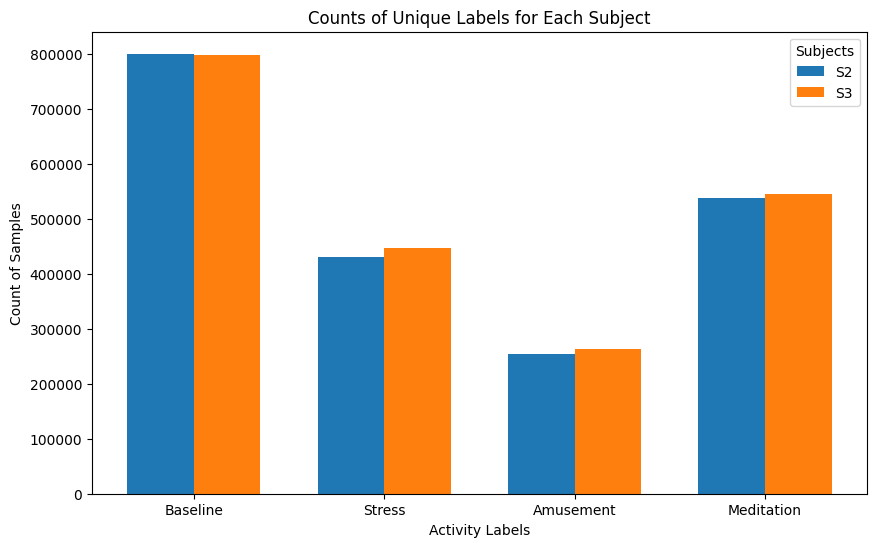

In [5]:
# Initialize dictionaries to store label counts for each subject
label_counts = {subject_id: {} for subject_id in combined_data.keys()}

# Count occurrences of each label for each subject
for subject_id, subject_data in combined_data.items():
    unique, counts = np.unique(subject_data['label'], return_counts=True)
    label_counts[subject_id] = dict(zip(unique, counts))

# Define activity names based on labels for better readability
activity_labels = {1: "Baseline", 2: "Stress", 3: "Amusement", 4: "Meditation"}

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
positions = np.arange(len(activity_labels))  # Positions for each label

# Plot bars for each subject
for i, (subject_id, counts) in enumerate(label_counts.items()):
    label_values = [counts.get(label, 0) for label in activity_labels.keys()]
    ax.bar(
        positions + i * bar_width, label_values,
        width=bar_width, label=subject_id
    )

# Configure the x-axis labels, title, and legend
ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(activity_labels.values())
ax.set_xlabel("Activity Labels")
ax.set_ylabel("Count of Samples")
ax.set_title("Counts of Unique Labels for Each Subject")
ax.legend(title="Subjects")

# Save and show the plot
fig.savefig('unique_labels_count.png')
plt.show()

In [2]:
combined_df=pd.read_csv(r'combined_data.csv')

In [10]:
# Define normal ranges for each feature
normal_ranges = {
    'chest_ACC_x': (-2, 2),
    'chest_ACC_y': (-2, 2),
    'chest_ACC_z': (-2, 2),
    'chest_ECG': (0.1, 10),  # Example range for ECG values
    'chest_EMG': (0, 10),  # Example range for EMG values
    'chest_EDA': (0, 1),  # Example range for EDA values
    'chest_Temp': (36.1, 37.2),
    'chest_Resp': (12, 20),
}

# Function to check if a value is within the normal range
def check_normal(value, range_tuple):
    return range_tuple[0] <= value <= range_tuple[1]

# Initialize counters for in-range and out-of-range values
in_range_count = {feature: 0 for feature in normal_ranges.keys()}
out_of_range_count = {feature: 0 for feature in normal_ranges.keys()}

# Loop through each row in the DataFrame to compare values with normal ranges
for index, row in combined_df.iterrows():
    for feature, normal_range in normal_ranges.items():
        if check_normal(row[feature], normal_range):
            in_range_count[feature] += 1
        else:
            out_of_range_count[feature] += 1

# Create DataFrames for in-range and out-of-range counts
in_range_df = pd.DataFrame(list(in_range_count.items()), columns=['Feature', 'In Range Count'])
out_of_range_df = pd.DataFrame(list(out_of_range_count.items()), columns=['Feature', 'Out of Range Count'])

# Display the counts
print("\nIn Range Count:")
print(in_range_df)
print("\nOut of Range Count:")
print(out_of_range_df)

# Optionally, display combined statistics
total_records = len(combined_df)
print("\nTotal Records:", total_records)


In Range Count:
       Feature  In Range Count
0  chest_ACC_x         8800276
1  chest_ACC_y         8800317
2  chest_ACC_z         8800210
3    chest_ECG         1156351
4    chest_EMG         3648514
5    chest_EDA         1557692
6   chest_Temp               0
7   chest_Resp           46516

Out of Range Count:
       Feature  Out of Range Count
0  chest_ACC_x                 124
1  chest_ACC_y                  83
2  chest_ACC_z                 190
3    chest_ECG             7644049
4    chest_EMG             5151886
5    chest_EDA             7242708
6   chest_Temp             8800400
7   chest_Resp             8753884

Total Records: 8800400


In [3]:
# Define ranges for each chest feature
ranges = {
    'chest_ACC_x': {'normal': (-1, 1), 'abnormal': (-2, 2)},
    'chest_ACC_y': {'normal': (-1, 1), 'abnormal': (-2, 2)},
    'chest_ACC_z': {'normal': (-1, 1), 'abnormal': (-2, 2)},
    'chest_ECG': {'normal': (0.5, 3.0), 'abnormal': (0, 5.0)},  # mV
    'chest_EMG': {'normal': (0.1, 5.0), 'abnormal': (0, 10.0)}, # mV
    'chest_EDA': {'normal': (0.01, 1.0), 'abnormal': (0, 2.0)}, # µS
    'chest_Temp': {'normal': (36.1, 37.2), 'abnormal': (35.0, 38.5)}, # °C
    'chest_Resp': {'normal': (12, 20), 'abnormal': (8, 25)},  # % Respiration rate
}

# Initialize counters for each range
range_counts = {
    feature: {'Normal Range': 0, 'Abnormal Range': 0, 'Out of Range': 0} for feature in ranges.keys()
}

# Function to check range category
def check_range(value, normal, abnormal):
    if normal[0] <= value <= normal[1]:
        return 'Normal Range'
    elif abnormal[0] <= value <= abnormal[1]:
        return 'Abnormal Range'
    else:
        return 'Out of Range'

# Iterate through each row and classify values
for index, row in combined_df.iterrows():
    for feature, range_vals in ranges.items():
        range_category = check_range(row[feature], range_vals['normal'], range_vals['abnormal'])
        range_counts[feature][range_category] += 1

# Display counts for each range
for feature, counts in range_counts.items():
    print(f"\nFeature: {feature}")
    for range_category, count in counts.items():
        print(f"{range_category}: {count}")

# Optionally, convert to DataFrame for easy viewing
range_counts_df = pd.DataFrame(range_counts).transpose()
print("\nRange Counts DataFrame:")
print(range_counts_df)


Feature: chest_ACC_x
Normal Range: 8754954
Abnormal Range: 45322
Out of Range: 124

Feature: chest_ACC_y
Normal Range: 8800286
Abnormal Range: 31
Out of Range: 83

Feature: chest_ACC_z
Normal Range: 8799631
Abnormal Range: 579
Out of Range: 190

Feature: chest_ECG
Normal Range: 265831
Abnormal Range: 3729816
Out of Range: 4804753

Feature: chest_EMG
Normal Range: 54883
Abnormal Range: 3593631
Out of Range: 5151886

Feature: chest_EDA
Normal Range: 1557609
Abnormal Range: 1972077
Out of Range: 5270714

Feature: chest_Temp
Normal Range: 0
Abnormal Range: 0
Out of Range: 8800400

Feature: chest_Resp
Normal Range: 46516
Abnormal Range: 139875
Out of Range: 8614009

Range Counts DataFrame:
             Normal Range  Abnormal Range  Out of Range
chest_ACC_x       8754954           45322           124
chest_ACC_y       8800286              31            83
chest_ACC_z       8799631             579           190
chest_ECG          265831         3729816       4804753
chest_EMG           54883

In [6]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800400 entries, 0 to 8800399
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   subject_id   object 
 1   label        int64  
 2   chest_ACC_x  float64
 3   chest_ACC_y  float64
 4   chest_ACC_z  float64
 5   chest_ECG    float64
 6   chest_EMG    float64
 7   chest_EDA    float64
 8   chest_Temp   float64
 9   chest_Resp   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 671.4+ MB


C:\Users\Bavelakpc\AppData\Local\Temp\ipykernel_25468\201430423.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='Features', y='Values', palette="Set2")


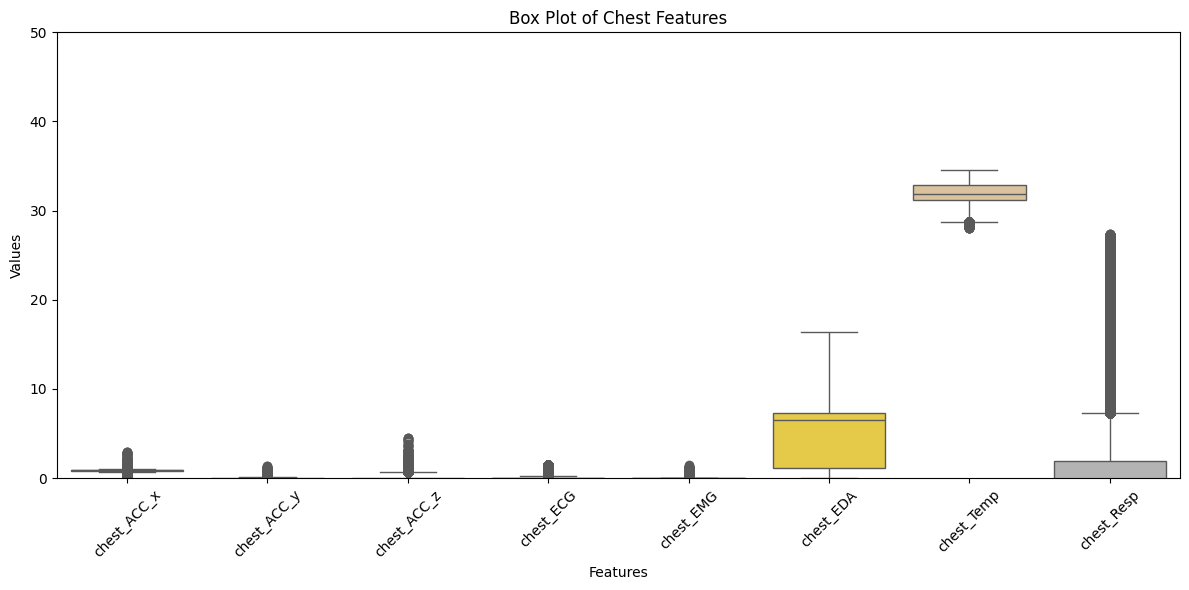

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = [
    'chest_ACC_x', 'chest_ACC_y', 'chest_ACC_z', 
    'chest_ECG', 'chest_EMG', 'chest_EDA', 
    'chest_Temp', 'chest_Resp'
]

# Set up the figure size
plt.figure(figsize=(12, 6))

# Melt the DataFrame for easier plotting with Seaborn
melted_df = combined_df[columns_to_plot].melt(var_name='Features', value_name='Values')

# Create box plot
sns.boxplot(data=melted_df, x='Features', y='Values', palette="Set2")

# Set y-axis limits to between 0 and 50
plt.ylim(0, 50)

# Title and labels
plt.title('Box Plot of Chest Features')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


<Axes: >

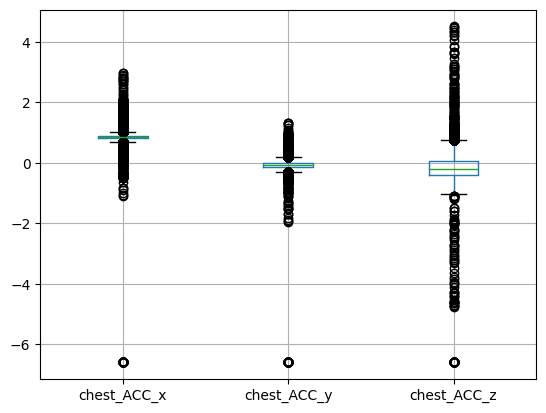

In [10]:
combined_df.boxplot(column=['chest_ACC_x','chest_ACC_y','chest_ACC_z'])

<Axes: >

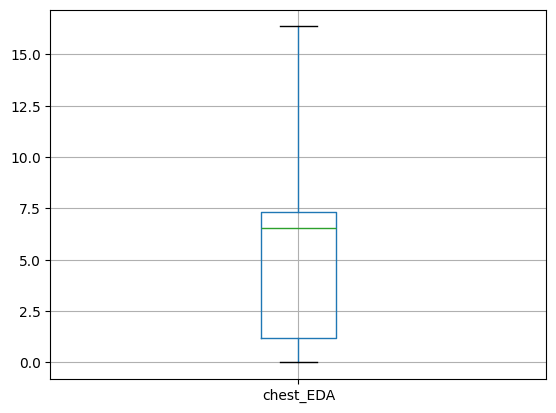

In [12]:
combined_df.boxplot(column=['chest_EDA'])

<Axes: >

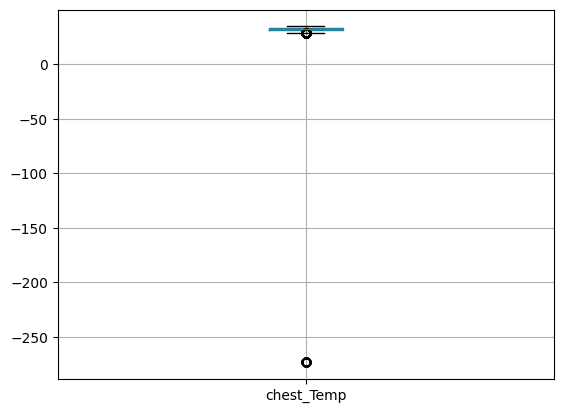

In [13]:
combined_df.boxplot(column=['chest_Temp'])

<Axes: >

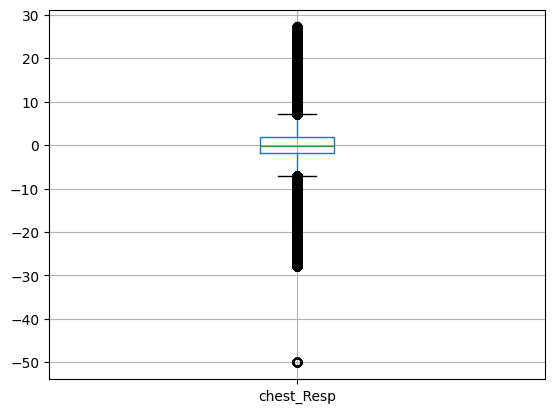

In [14]:
combined_df.boxplot(column=['chest_Resp'])

In [17]:
# Select only numeric columns from combined_df for quantile calculation
numeric_df = combined_df.select_dtypes(include=['float64', 'int64'])

# Calculate the first and third quartiles (Q1 and Q3) and the interquartile range (IQR)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

print("First Quartile (Q1):\n", Q1)
print("Third Quartile (Q3):\n", Q3)
print("Interquartile Range (IQR):\n", IQR)


First Quartile (Q1):
 label           0.000000
chest_ACC_x     0.812600
chest_ACC_y    -0.126200
chest_ACC_z    -0.400200
chest_ECG      -0.114761
chest_EMG      -0.010574
chest_EDA       1.176453
chest_Temp     31.184052
chest_Resp     -1.702881
Name: 0.25, dtype: float64
Third Quartile (Q3):
 label           2.000000
chest_ACC_x     0.899000
chest_ACC_y    -0.003400
chest_ACC_z     0.056200
chest_ECG       0.039597
chest_EMG       0.005035
chest_EDA       7.323837
chest_Temp     32.824800
chest_Resp      1.879883
Name: 0.75, dtype: float64
Interquartile Range (IQR):
 label          2.000000
chest_ACC_x    0.086400
chest_ACC_y    0.122800
chest_ACC_z    0.456400
chest_ECG      0.154358
chest_EMG      0.015610
chest_EDA      6.147385
chest_Temp     1.640748
chest_Resp     3.582764
dtype: float64


In [18]:
# Define the lower and upper bounds for each feature
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter combined_df to include only values within the bounds
filtered_df = combined_df[(
    (numeric_df >= lower_bound) & (numeric_df <= upper_bound)
).all(axis=1)]

# Display filtered data
print(filtered_df)


        subject_id  label  chest_ACC_x  chest_ACC_y  chest_ACC_z  chest_ECG  \
0               S2      0       0.9554      -0.2220      -0.5580   0.021423   
1               S2      0       0.9258      -0.2216      -0.5538   0.020325   
2               S2      0       0.9082      -0.2196      -0.5392   0.016525   
3               S2      0       0.8974      -0.2102      -0.5122   0.016708   
4               S2      0       0.8882      -0.2036      -0.4824   0.011673   
...            ...    ...          ...          ...          ...        ...   
8800372         S3      0       0.9250       0.1192      -0.0548   0.106705   
8800373         S3      0       0.9260       0.1218      -0.0494   0.040970   
8800377         S3      0       0.9358       0.1226      -0.0330  -0.135544   
8800383         S3      0       0.9378       0.1070      -0.0186  -0.230850   
8800390         S3      0       0.9242       0.0584       0.0022  -0.295578   

         chest_EMG  chest_EDA  chest_Temp  chest_Re

In [19]:
filtered_df.describe()

,label,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp
count,5.169645e+06,5.169645e+06,5.169645e+06,5.169645e+06,5.169645e+06,5.169645e+06,5.169645e+06,5.169645e+06,5.169645e+06
mean,1.065972e+00,8.713939e-01,-5.619609e-02,-1.195416e-01,-4.321089e-02,-2.511595e-03,4.908764e+00,3.194151e+01,2.683783e-02
std,1.405134e+00,4.033628e-02,8.011718e-02,2.588626e-01,1.099913e-01,1.157724e-02,3.087824e+00,1.043470e+00,2.664578e+00
min,0.000000e+00,6.830000e-01,-3.104000e-01,-1.021400e+00,-3.462982e-01,-3.396606e-02,2.784729e-01,2.872351e+01,-7.077026e+00
25%,0.000000e+00,8.446000e-01,-1.246000e-01,-3.272000e-01,-1.157684e-01,-9.658813e-03,1.226425e+00,3.124579e+01,-1.799011e+00
50%,0.000000e+00,8.782001e-01,-5.140001e-02,-1.812000e-01,-2.114868e-02,-2.334595e-03,6.653976e+00,3.191586e+01,-2.120972e-01
75%,2.000000e+00,9.026000e-01,-1.399994e-03,2.499998e-02,2.352905e-02,4.623413e-03,7.360077e+00,3.289075e+01,1.942444e+00
max,5.000000e+00,1.028600e+00,1.806000e-01,7.408000e-01,2.711334e-01,2.842712e-02,1.633759e+01,3.452197e+01,7.254028e+00


In [20]:
filtered_df.to_csv('filtered_data.csv', index=False)

In [21]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169645 entries, 0 to 8800390
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   subject_id   object 
 1   label        int64  
 2   chest_ACC_x  float64
 3   chest_ACC_y  float64
 4   chest_ACC_z  float64
 5   chest_ECG    float64
 6   chest_EMG    float64
 7   chest_EDA    float64
 8   chest_Temp   float64
 9   chest_Resp   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 433.9+ MB


In [22]:
print(filtered_df["label"].value_counts())

label
0    2839477
2     683012
1     669956
3     475371
4     460540
5      41289
Name: count, dtype: int64


In [23]:
filtered_df = filtered_df[filtered_df['label'] != 5]

In [24]:
print(filtered_df["label"].value_counts())

label
0    2839477
2     683012
1     669956
3     475371
4     460540
Name: count, dtype: int64


In [25]:
filtered_df.to_csv('filtered_data.csv', index=False)

array([[<Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'chest_ACC_x'}>,
        <Axes: title={'center': 'chest_ACC_y'}>],
       [<Axes: title={'center': 'chest_ACC_z'}>,
        <Axes: title={'center': 'chest_ECG'}>,
        <Axes: title={'center': 'chest_EMG'}>],
       [<Axes: title={'center': 'chest_EDA'}>,
        <Axes: title={'center': 'chest_Temp'}>,
        <Axes: title={'center': 'chest_Resp'}>]], dtype=object)

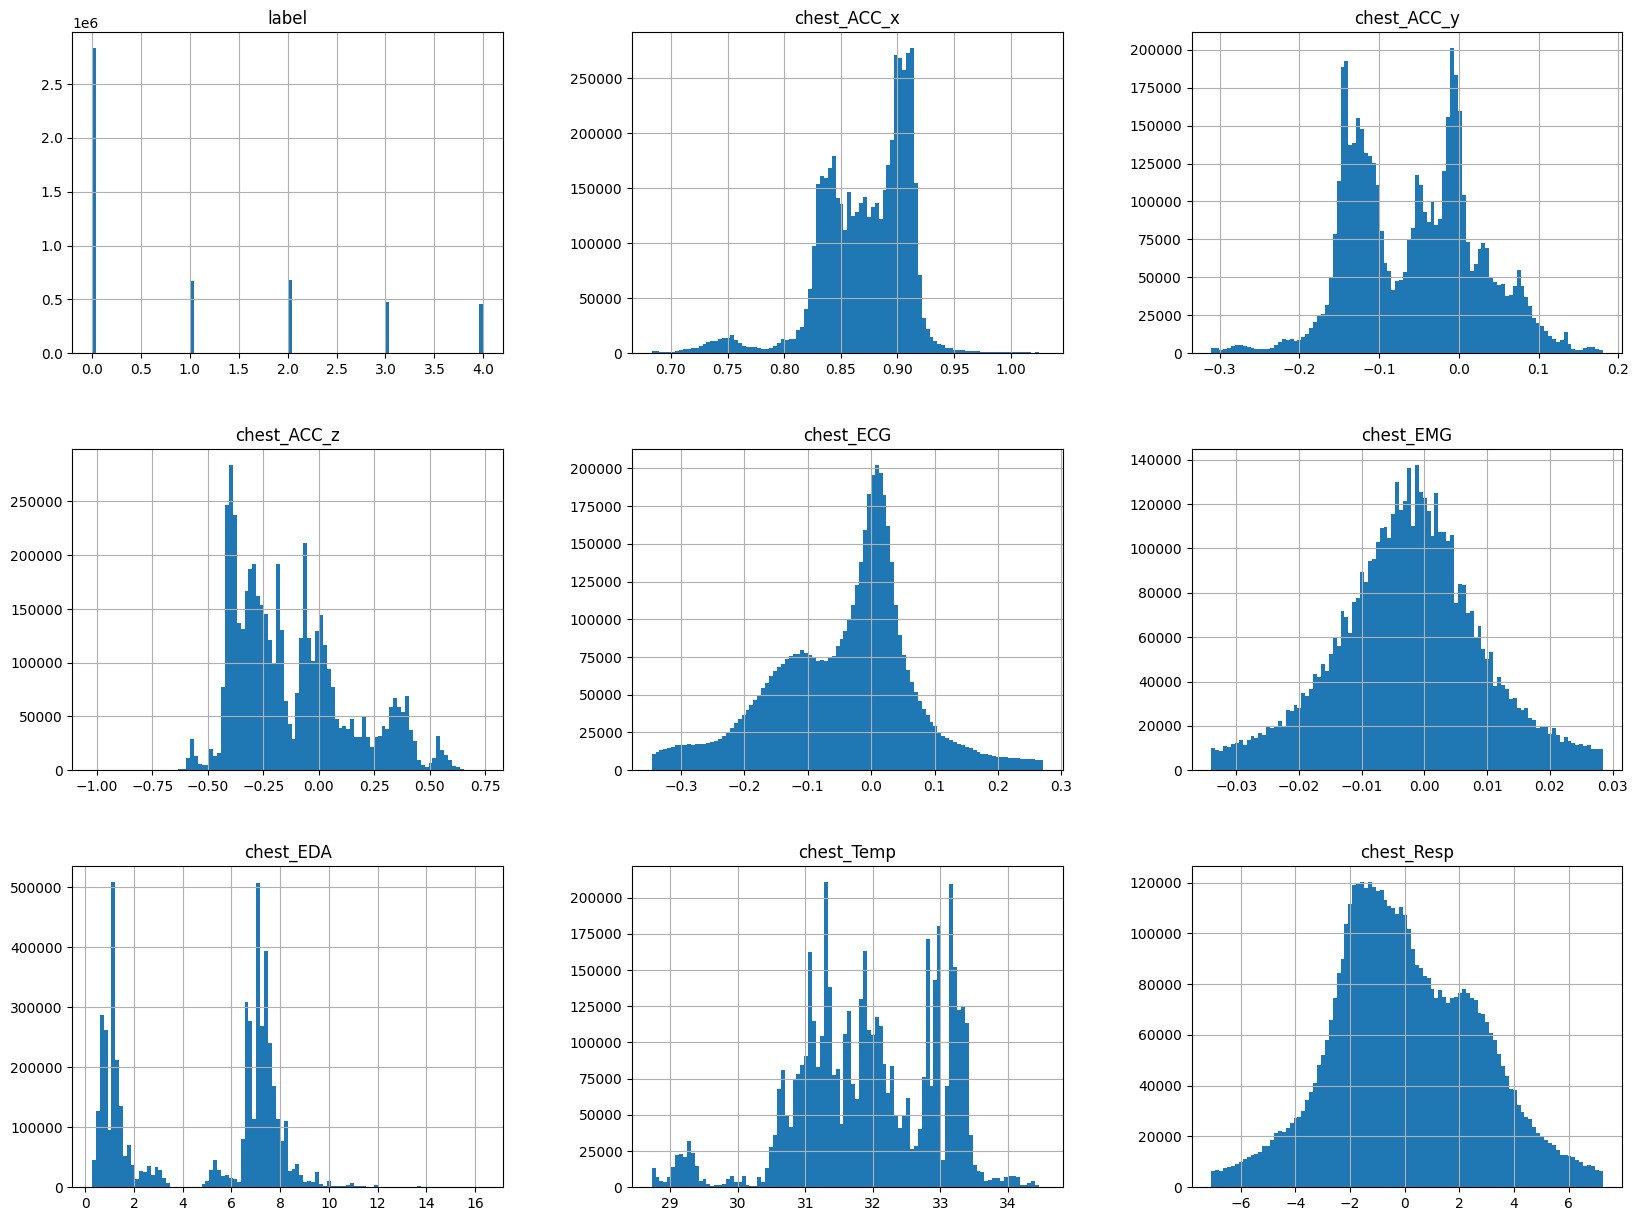

In [26]:
filtered_df.hist(bins=100, figsize = (20,15))
#pyplot.hist(df_out)

In [28]:
# Select only numeric columns for the correlation matrix
numeric_df = filtered_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix

,label,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp
label,1.000000,0.216783,0.130653,-0.211876,-0.034378,-0.021997,0.200815,0.343921,0.013634
chest_ACC_x,0.216783,1.000000,0.123066,0.083406,0.037228,0.003018,-0.079879,0.104712,-0.027008
chest_ACC_y,0.130653,0.123066,1.000000,0.323769,-0.158027,-0.026193,0.730826,0.569905,-0.004740
chest_ACC_z,-0.211876,0.083406,0.323769,1.000000,-0.075563,0.005745,0.324064,0.503164,-0.028582
chest_ECG,-0.034378,0.037228,-0.158027,-0.075563,1.000000,0.005037,-0.194035,-0.122324,0.008451
chest_EMG,-0.021997,0.003018,-0.026193,0.005745,0.005037,1.000000,-0.030269,-0.017089,-0.000353
chest_EDA,0.200815,-0.079879,0.730826,0.324064,-0.194035,-0.030269,1.000000,0.465767,0.008990
chest_Temp,0.343921,0.104712,0.569905,0.503164,-0.122324,-0.017089,0.465767,1.000000,0.008676
chest_Resp,0.013634,-0.027008,-0.004740,-0.028582,0.008451,-0.000353,0.008990,0.008676,1.000000


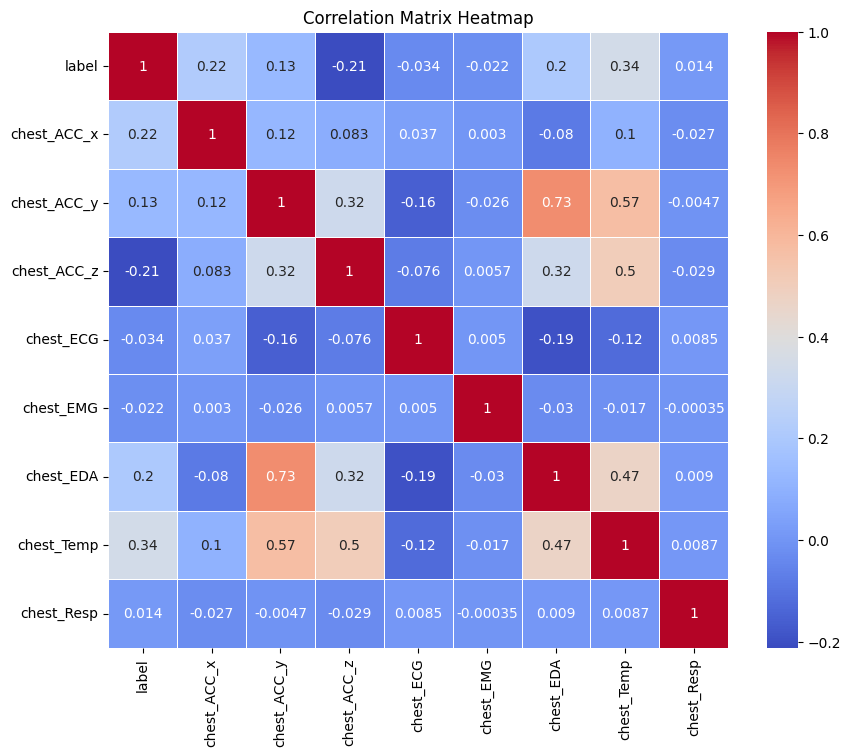

In [29]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

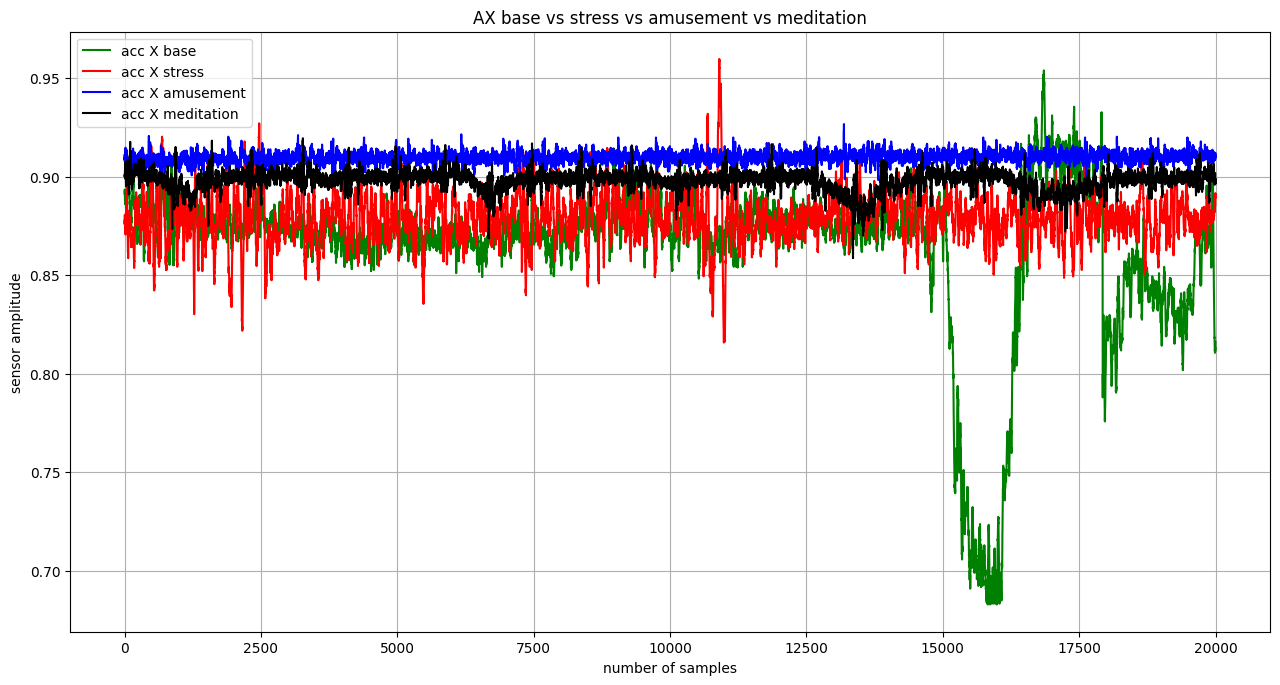

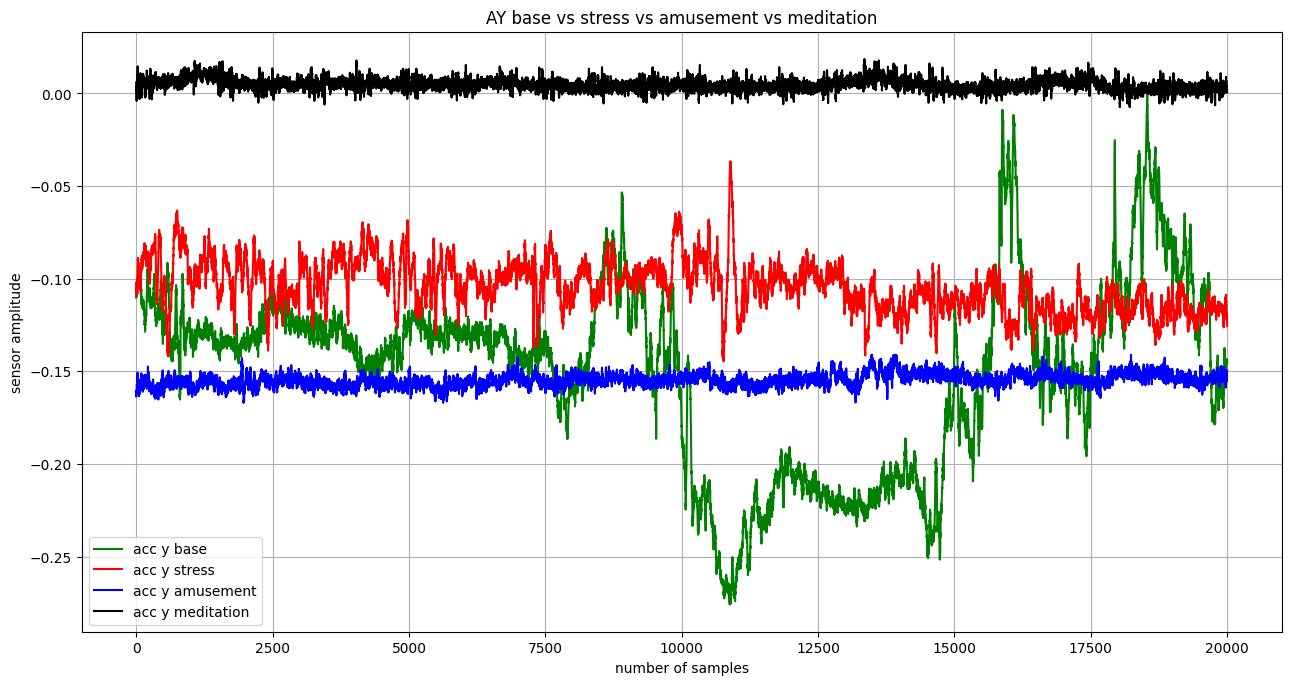

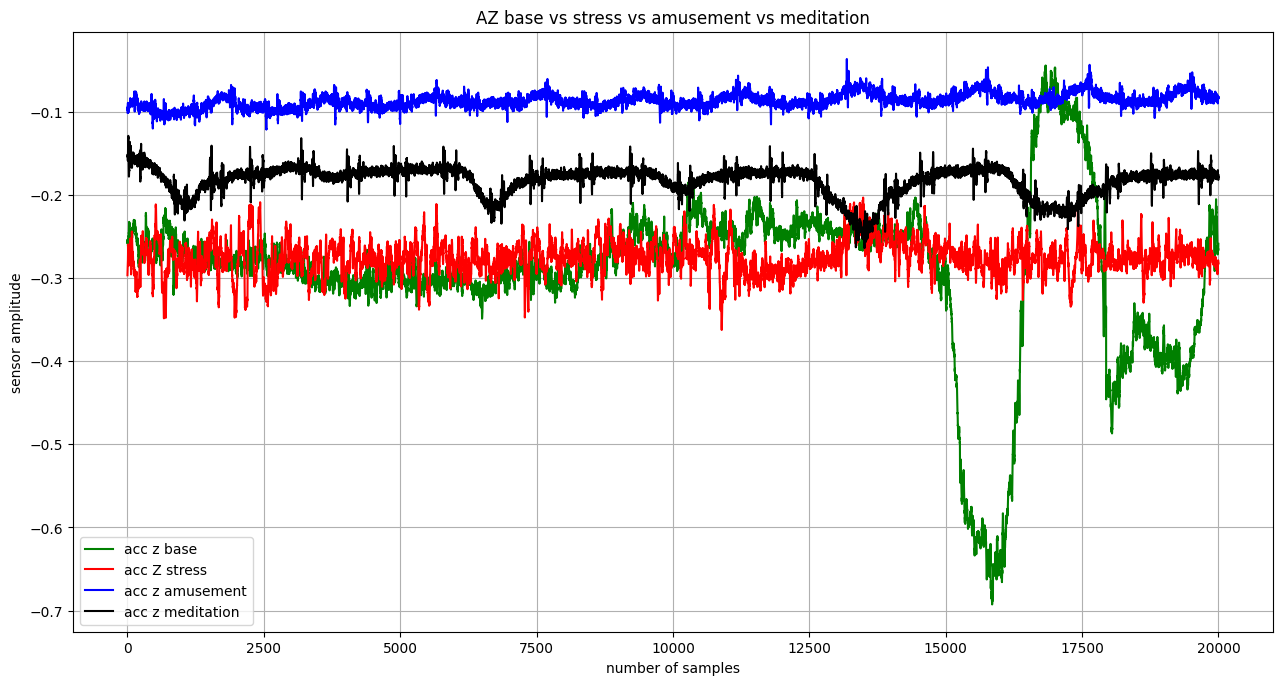

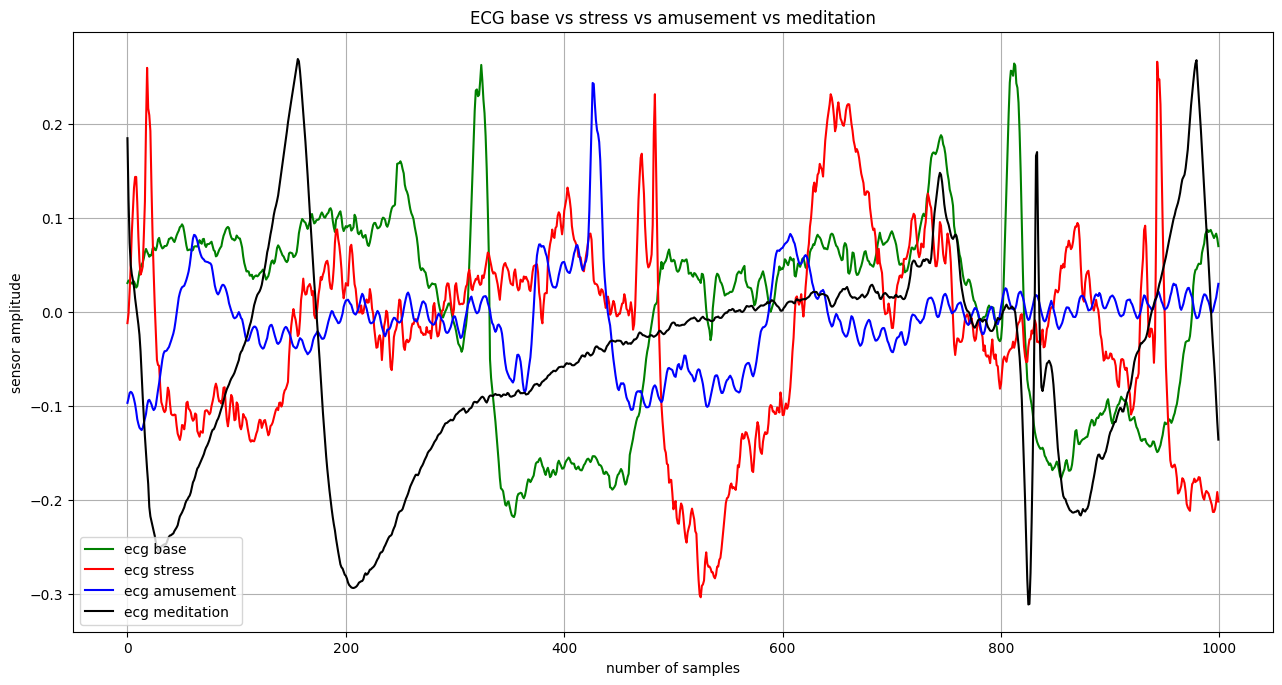

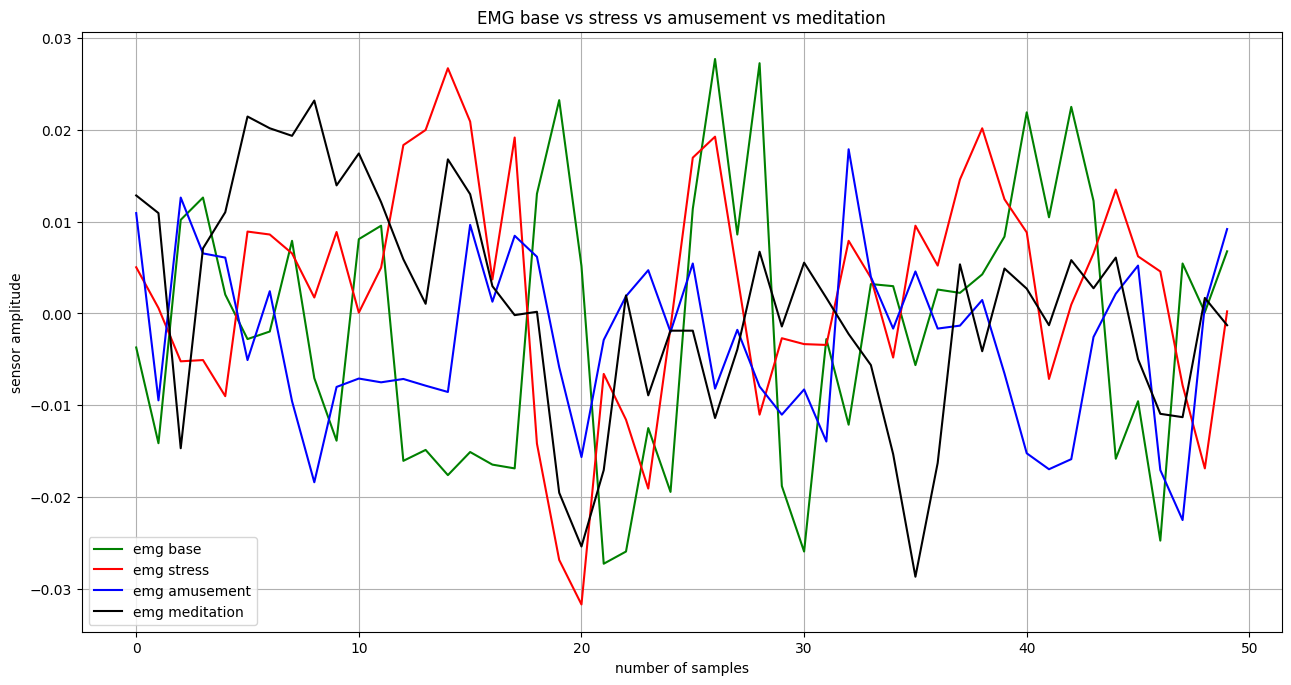

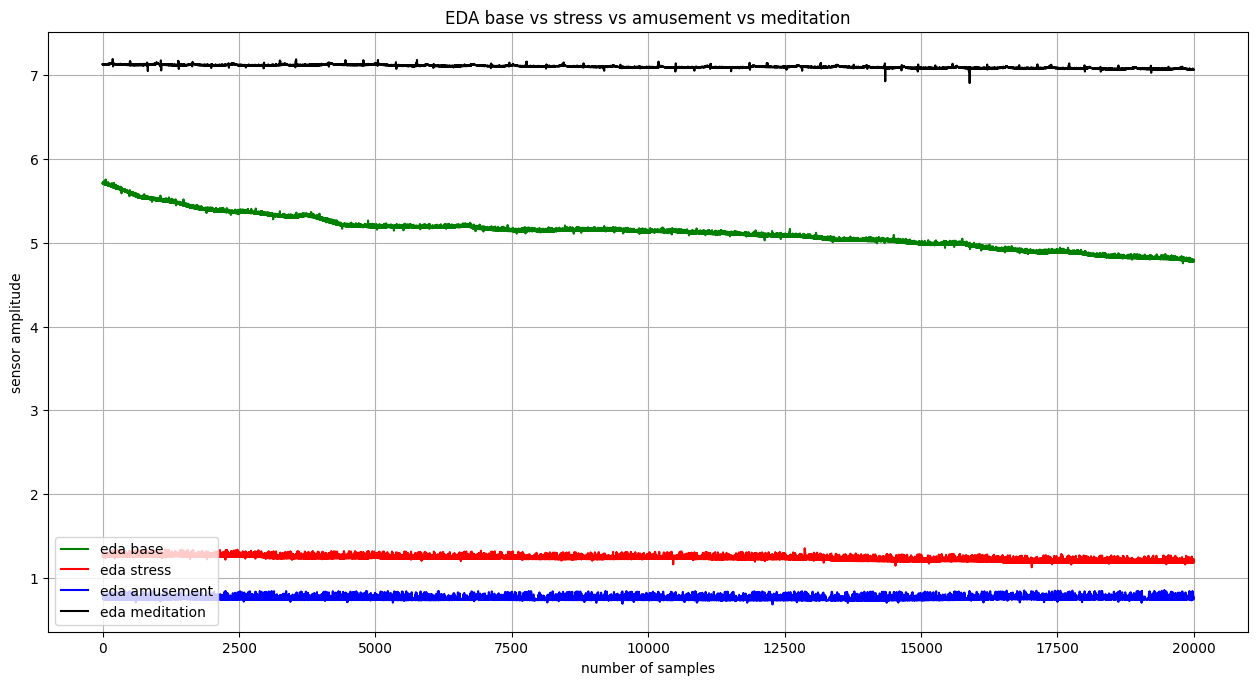

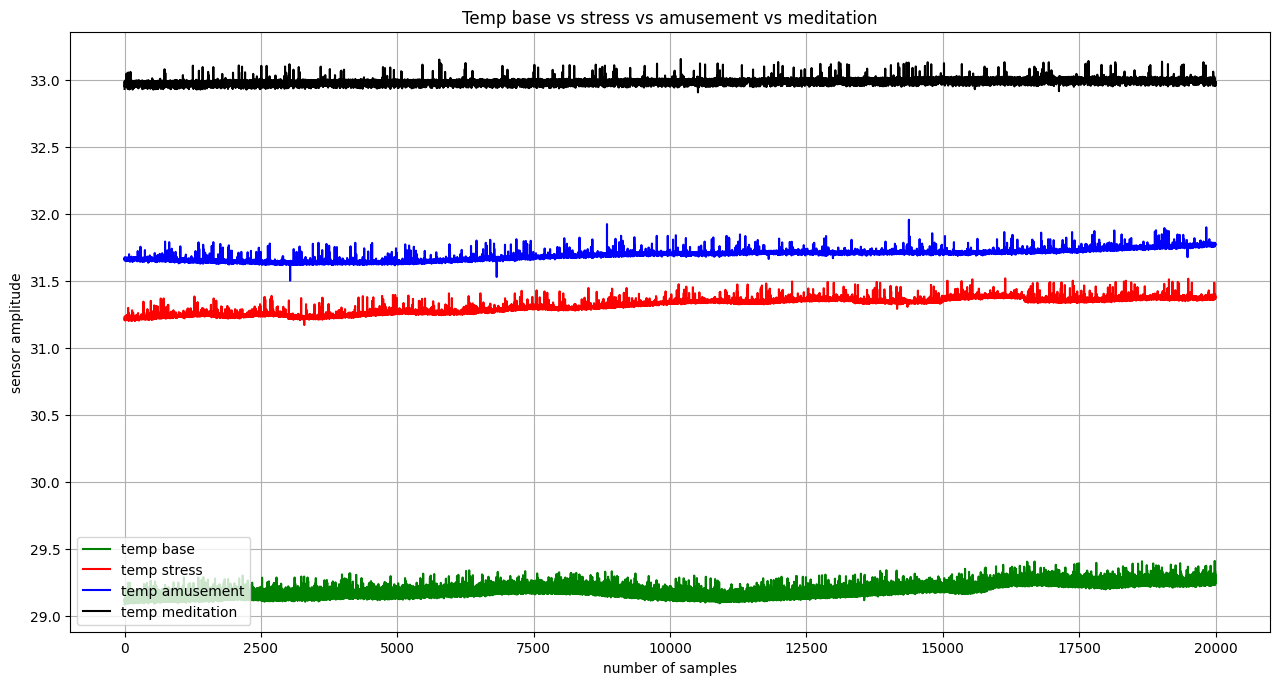

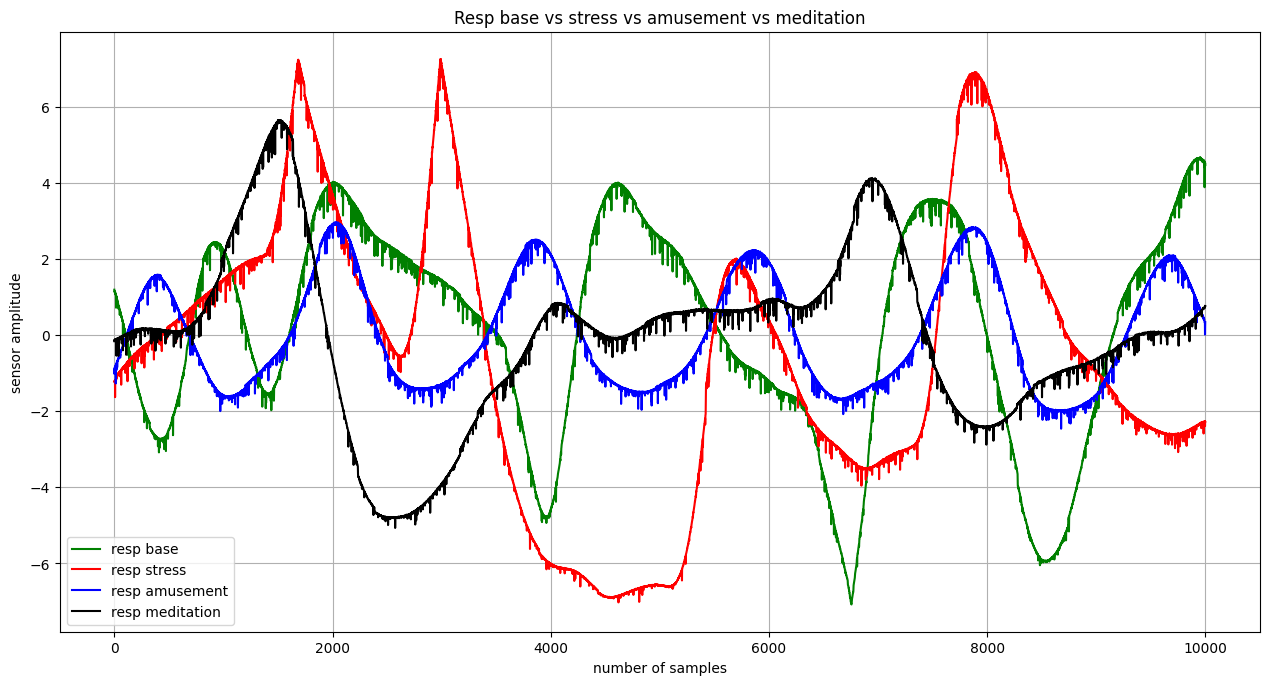

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data by labels for the different states
base_df = filtered_df[filtered_df['label'] == 1]
stress_df = filtered_df[filtered_df['label'] == 2]
amus_df = filtered_df[filtered_df['label'] == 3]
medi_df = filtered_df[filtered_df['label'] == 4]

# 1. ACC_x
y_ax = base_df["chest_ACC_x"][:20000].values
y_ax_s = stress_df["chest_ACC_x"][:20000].values
y_ax_a = amus_df["chest_ACC_x"][:20000].values
y_ax_m = medi_df["chest_ACC_x"][:20000].values
x_ax = np.arange(len(y_ax))

fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_axes([0.1, 0.1, 2, 2])
ax1.plot(x_ax, y_ax, color='green', label="acc X base")
ax1.plot(x_ax, y_ax_s, color='red', label="acc X stress")
ax1.plot(x_ax, y_ax_a, color='blue', label="acc X amusement")
ax1.plot(x_ax, y_ax_m, color='black', label="acc X meditation")
ax1.set(xlabel='number of samples', ylabel='sensor amplitude', title='AX base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='upper left')
plt.show()

# 2. ACC_y
y_ay = base_df["chest_ACC_y"][:20000].values
y_ay_s = stress_df["chest_ACC_y"][:20000].values
y_ay_a = amus_df["chest_ACC_y"][:20000].values
y_ay_m = medi_df["chest_ACC_y"][:20000].values
x_ay = np.arange(len(y_ay))

fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_axes([0.1, 0.1, 2, 2])
ax1.plot(x_ay, y_ay, color='green', label="acc y base")
ax1.plot(x_ay, y_ay_s, color='red', label="acc y stress")
ax1.plot(x_ay, y_ay_a, color='blue', label="acc y amusement")
ax1.plot(x_ay, y_ay_m, color='black', label="acc y meditation")
ax1.set(xlabel='number of samples', ylabel='sensor amplitude', title='AY base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

# 3. ACC_z
y_az = base_df["chest_ACC_z"][:20000].values
y_az_s = stress_df["chest_ACC_z"][:20000].values
y_az_a = amus_df["chest_ACC_z"][:20000].values
y_az_m = medi_df["chest_ACC_z"][:20000].values
x_az = np.arange(len(y_az))

fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_axes([0.1, 0.1, 2, 2])
ax1.plot(x_az, y_az, color='green', label="acc z base")
ax1.plot(x_az, y_az_s, color='red', label="acc Z stress")
ax1.plot(x_az, y_az_a, color='blue', label="acc z amusement")
ax1.plot(x_az, y_az_m, color='black', label="acc z meditation")
ax1.set(xlabel='number of samples', ylabel='sensor amplitude', title='AZ base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

# 4. ECG
y_ecg = base_df["chest_ECG"][:1000].values
y_ecg_s = stress_df["chest_ECG"][:1000].values
y_ecg_a = amus_df["chest_ECG"][:1000].values
y_ecg_m = medi_df["chest_ECG"][:1000].values
x_ecg = np.arange(len(y_ecg))

fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_axes([0.1, 0.1, 2, 2])
ax1.plot(x_ecg, y_ecg, color='green', label="ecg base")
ax1.plot(x_ecg, y_ecg_s, color='red', label="ecg stress")
ax1.plot(x_ecg, y_ecg_a, color='blue', label="ecg amusement")
ax1.plot(x_ecg, y_ecg_m, color='black', label="ecg meditation")
ax1.set(xlabel='number of samples', ylabel='sensor amplitude', title='ECG base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

# 5. EMG
y_emg = base_df["chest_EMG"][:50].values
y_emg_s = stress_df["chest_EMG"][:50].values
y_emg_a = amus_df["chest_EMG"][:50].values
y_emg_m = medi_df["chest_EMG"][:50].values
x_emg = np.arange(len(y_emg))

fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_axes([0.1, 0.1, 2, 2])
ax1.plot(x_emg, y_emg, color='green', label="emg base")
ax1.plot(x_emg, y_emg_s, color='red', label="emg stress")
ax1.plot(x_emg, y_emg_a, color='blue', label="emg amusement")
ax1.plot(x_emg, y_emg_m, color='black', label="emg meditation")
ax1.set(xlabel='number of samples', ylabel='sensor amplitude', title='EMG base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

# 6. EDA
y_eda = base_df["chest_EDA"][:20000].values
y_eda_s = stress_df["chest_EDA"][:20000].values
y_eda_a = amus_df["chest_EDA"][:20000].values
y_eda_m = medi_df["chest_EDA"][:20000].values
x_eda = np.arange(len(y_eda))

fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_axes([0.1, 0.1, 2, 2])
ax1.plot(x_eda, y_eda, color='green', label="eda base")
ax1.plot(x_eda, y_eda_s, color='red', label="eda stress")
ax1.plot(x_eda, y_eda_a, color='blue', label="eda amusement")
ax1.plot(x_eda, y_eda_m, color='black', label="eda meditation")
ax1.set(xlabel='number of samples', ylabel='sensor amplitude', title='EDA base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

# 7. Temperature
y_temp = base_df["chest_Temp"][:20000].values
y_temp_s = stress_df["chest_Temp"][:20000].values
y_temp_a = amus_df["chest_Temp"][:20000].values
y_temp_m = medi_df["chest_Temp"][:20000].values
x_temp = np.arange(len(y_temp))

fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_axes([0.1, 0.1, 2, 2])
ax1.plot(x_temp, y_temp, color='green', label="temp base")
ax1.plot(x_temp, y_temp_s, color='red', label="temp stress")
ax1.plot(x_temp, y_temp_a, color='blue', label="temp amusement")
ax1.plot(x_temp, y_temp_m, color='black', label="temp meditation")
ax1.set(xlabel='number of samples', ylabel='sensor amplitude', title='Temp base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()

# 8. Respiration
y_resp = base_df["chest_Resp"][:10000].values
y_resp_s = stress_df["chest_Resp"][:10000].values
y_resp_a = amus_df["chest_Resp"][:10000].values
y_resp_m = medi_df["chest_Resp"][:10000].values
x_resp = np.arange(len(y_resp))

fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_axes([0.1, 0.1, 2, 2])
ax1.plot(x_resp, y_resp, color='green', label="resp base")
ax1.plot(x_resp, y_resp_s, color='red', label="resp stress")
ax1.plot(x_resp, y_resp_a, color='blue', label="resp amusement")
ax1.plot(x_resp, y_resp_m, color='black', label="resp meditation")
ax1.set(xlabel='number of samples', ylabel='sensor amplitude', title='Resp base vs stress vs amusement vs meditation')
ax1.grid()
plt.legend(loc='lower left')
plt.show()
